In [3]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from .txt format (assuming it's tab-separated or comma-separated)
file_path = '../data/MachineLearningRating_v3.txt'

df = pd.read_csv(file_path, sep='|')



C:\Users\Akram 1\AppData\Local\Temp\ipykernel_17164\3710403150.py:10: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='|')


   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   

       AccountType  ...         ExcessSelected CoverCategory   CoverType  \
0  Current account  ...  Mobility - Windscreen    Windscreen  Windscreen   
1  Current account  ...  Mobility - Windscreen    Windscreen  Windscreen   
2  Current account  ...  Mobility - Windscreen    Windscreen  Windscreen   

             CoverGroup              Section                          Product  \
0  Comprehensive - Taxi  Mot

In [17]:
# 1. Data Summarization:
## Descriptive Statistics
print("Descriptive Statistics:")
numerical_columns = ['TotalPremium', 'TotalClaims']
print(df[numerical_columns].describe())

# Variability (Standard deviation) for numerical features
print("\nVariability (Standard Deviation):")
print(df[numerical_columns].std())


Descriptive Statistics:
       TotalPremium   TotalClaims
count  1.000098e+06  1.000098e+06
mean   6.190550e+01  6.486119e+01
std    2.302845e+02  2.384075e+03
min   -7.825768e+02 -1.200241e+04
25%    0.000000e+00  0.000000e+00
50%    2.178333e+00  0.000000e+00
75%    2.192982e+01  0.000000e+00
max    6.528260e+04  3.930921e+05

Variability (Standard Deviation):
TotalPremium     230.284513
TotalClaims     2384.074695
dtype: float64


In [18]:

# 1. Data Structure: Check dtypes
print("\nData Types:")
print(df.dtypes)

# 2. Check for categorical variables
print("\nCategorical Variables:")
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

# 3. Check for date variables
print("\nDate Variables:")
# Convert columns to datetime and check if the conversion is successful
date_cols = df.select_dtypes(include=['object']).apply(pd.to_datetime, errors='coerce').columns
print(date_cols)

# Identify columns that are not converted to datetime
non_date_cols = df.select_dtypes(include=['object']).columns.difference(date_cols)
print("\nNon-Date Object Columns:")
print(non_date_cols)

# Optionally, convert identified date columns
# df['DateColumn'] = pd.to_datetime(df['DateColumn'], errors='coerce')



Data Types:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors  

C:\Users\Akram 1\AppData\Local\Temp\ipykernel_17164\3516215907.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_cols = df.select_dtypes(include=['object']).apply(pd.to_datetime, errors='coerce').columns
C:\Users\Akram 1\AppData\Local\Temp\ipykernel_17164\3516215907.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_cols = df.select_dtypes(include=['object']).apply(pd.to_datetime, errors='coerce').columns
C:\Users\Akram 1\AppData\Local\Temp\ipykernel_17164\3516215907.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_cols = df.select_dtypes(include=['o

Index(['TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make',
       'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType'],
      dtype='object')

Non-Date Object Columns:
Index([], dtype='object')



Missing Values:
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoo

<Figure size 1000x500 with 0 Axes>

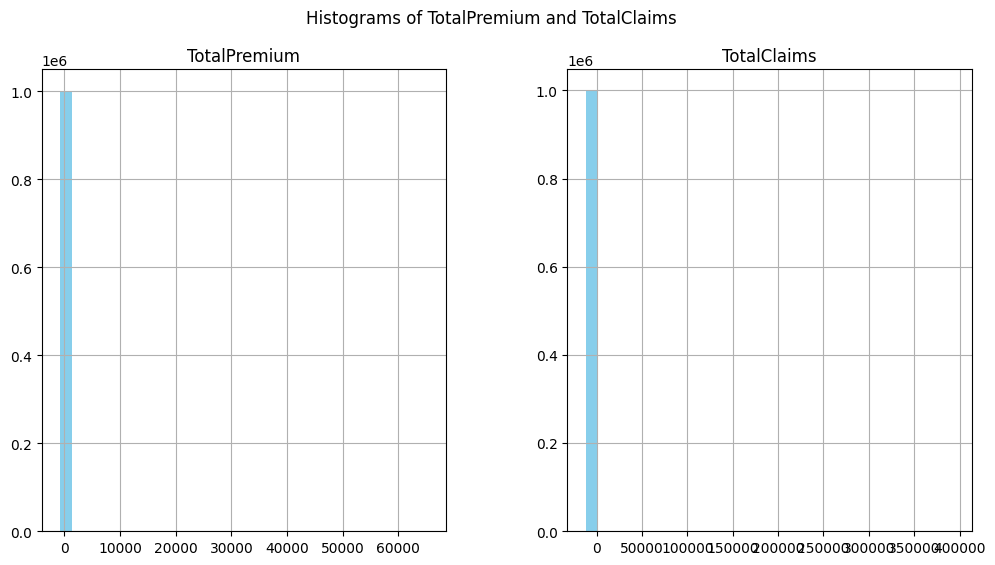

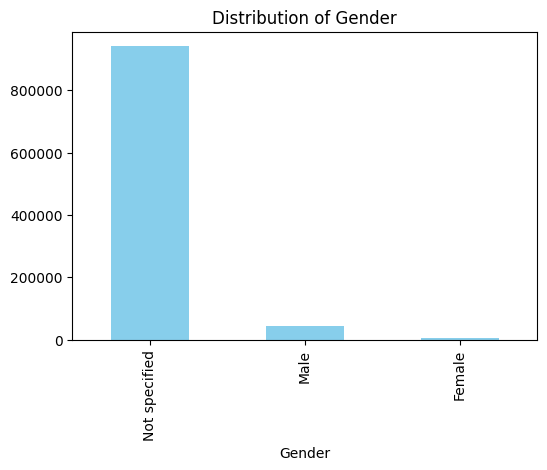

In [19]:



# 3. Data Quality Assessment:
## Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 4. Univariate Analysis:
## Distribution of Numerical Variables
plt.figure(figsize=(10, 5))
df[['TotalPremium', 'TotalClaims']].hist(bins=30, figsize=(12, 6), color='skyblue')
plt.suptitle('Histograms of TotalPremium and TotalClaims')
plt.show()

## Distribution of Categorical Variables
# Example with 'Gender' - Replace 'Gender' with an appropriate column from your dataset
plt.figure(figsize=(6, 4))
df['Gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Gender')
plt.show()

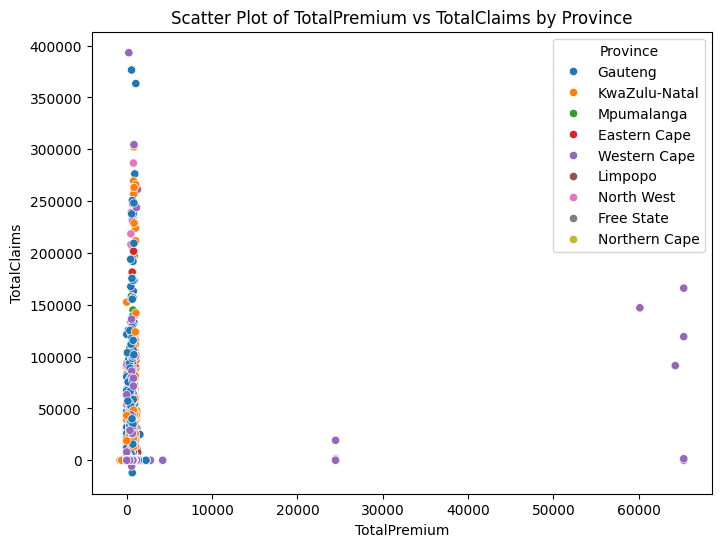

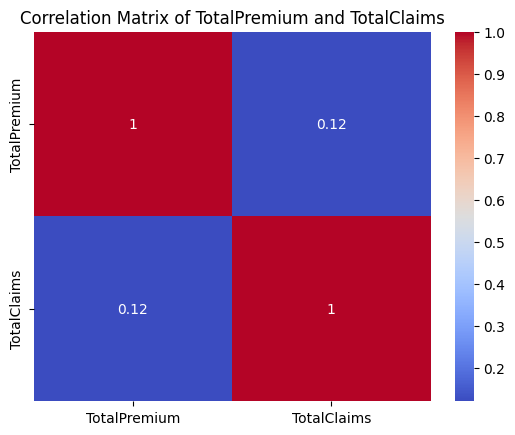

In [13]:

# Scatter plot for TotalPremium vs TotalClaims using Province as the hue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='Province', data=df)
plt.title('Scatter Plot of TotalPremium vs TotalClaims by Province')
plt.show()

# Correlation matrix for numerical variables (TotalPremium and TotalClaims)
correlation_matrix = df[['TotalPremium', 'TotalClaims']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of TotalPremium and TotalClaims')
plt.show()


In [12]:
print(df.columns)

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


C:\Users\Akram 1\AppData\Local\Temp\ipykernel_17164\2425049978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Province', y='TotalPremium', data=df, estimator='mean', palette='viridis')


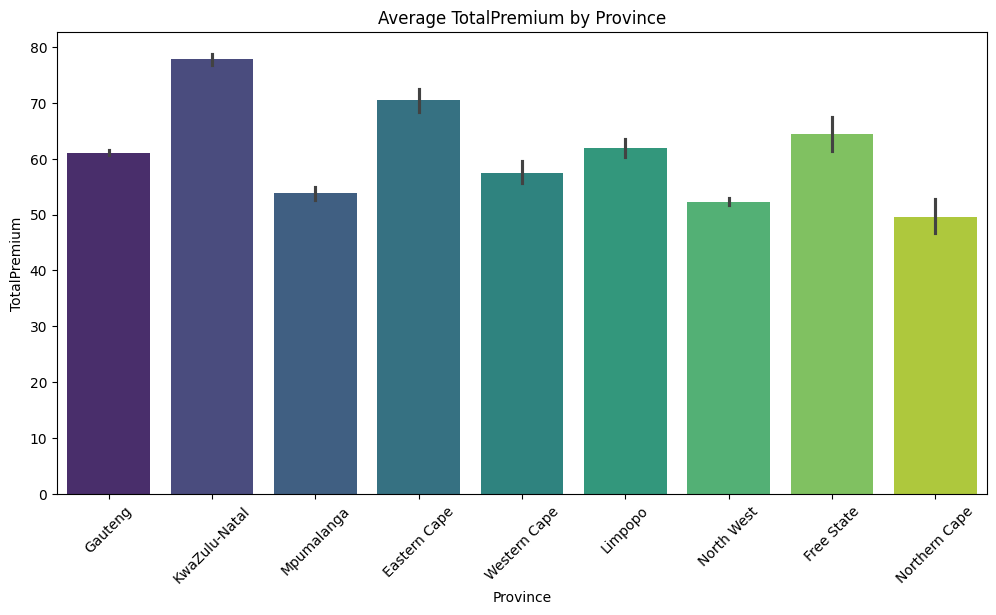

c:\Kifiya-week3\myvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


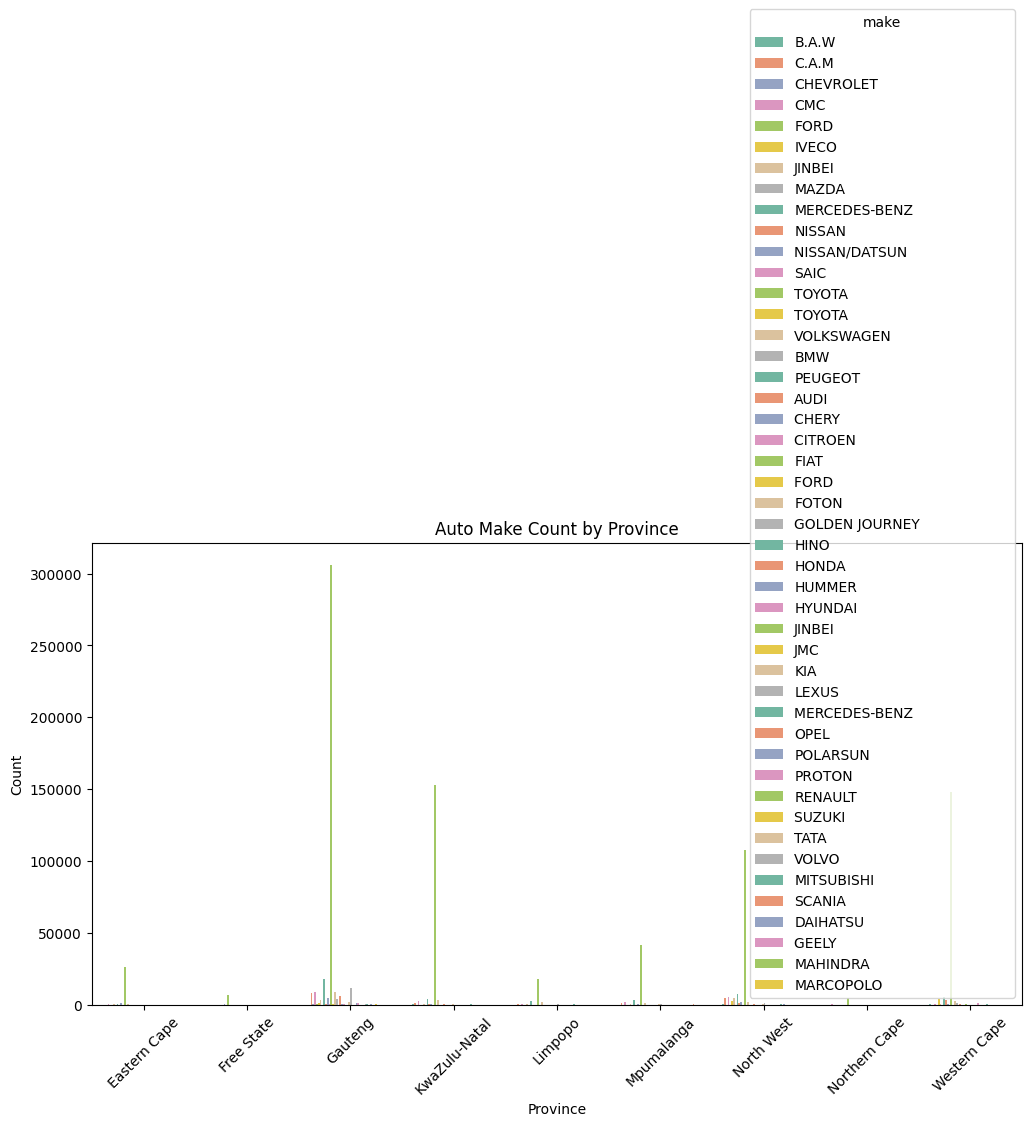

In [20]:
# 1. Data Comparison: Trends Over Geography

# Compare average TotalPremium by Province
plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='TotalPremium', data=df, estimator='mean', palette='viridis')
plt.title('Average TotalPremium by Province')
plt.xticks(rotation=45)
plt.show()

# Compare average Count of Auto Makes by Province
auto_make_count = df.groupby(['Province', 'make']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='Count', hue='make', data=auto_make_count, palette='Set2')
plt.title('Auto Make Count by Province')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 2. Outlier Detection: Box Plots

# Box plot for TotalPremium
plt.figure(figsize=(8, 6))
sns.boxplot(x='TotalPremium', data=df, color='lightcoral')
plt.title('Box Plot of TotalPremium')
plt.show()

# Box plot for TotalClaims
plt.figure(figsize=(8, 6))
sns.boxplot(x='TotalClaims', data=df, color='lightblue')
plt.title('Box Plot of TotalClaims')
plt.show()